In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [39]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

X = pd.get_dummies(X, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


31/31 [==============================] - 0s 1ms/step


Text(0.5, 257.44, 'Predicted Stroke Result')

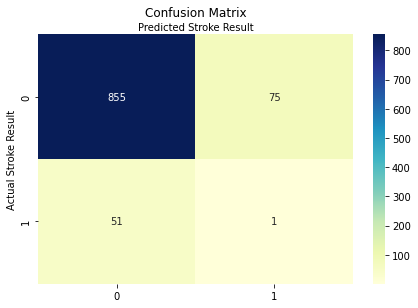

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build the model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Create the Adam optimizer with a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.6).astype(int)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_binary)


fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Stroke Result')
plt.xlabel('Predicted Stroke Result')

In [41]:
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the results
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.8716904276985743
F1 Score: 0.015625
Precision: 0.013157894736842105
Recall: 0.019230769230769232
Confusion matrix:
[[855  75]
 [ 51   1]]


Epoch 1/10
123/123 [==============================] - 1s 4ms/step - loss: 0.4829 - accuracy: 0.8582 - val_loss: 0.2327 - val_accuracy: 0.9460
Epoch 2/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9590 - val_loss: 0.2016 - val_accuracy: 0.9470
Epoch 3/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9598 - val_loss: 0.1949 - val_accuracy: 0.9460
Epoch 4/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9598 - val_loss: 0.1939 - val_accuracy: 0.9460
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9598 - val_loss: 0.1930 - val_accuracy: 0.9481
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9595 - val_loss: 0.1902 - val_accuracy: 0.9481
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9598 - val_loss: 0.1933 - val_accuracy: 0.9460
Epoch 

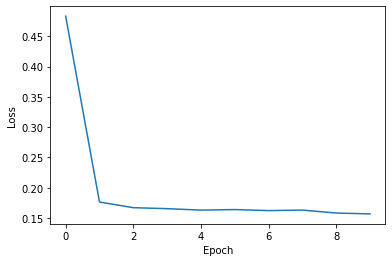

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Train the model, specifying the 'loss' metric to be recorded in the history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1,)

# Extract the loss values from the history object
loss = history.history['loss']

# Plot the loss values
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()